In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('waterQuality1.csv')

In [4]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [5]:
df['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [7]:
df = df[df['is_safe'] != '#NUM!']

In [8]:
df['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [9]:
df.shape

(7996, 21)

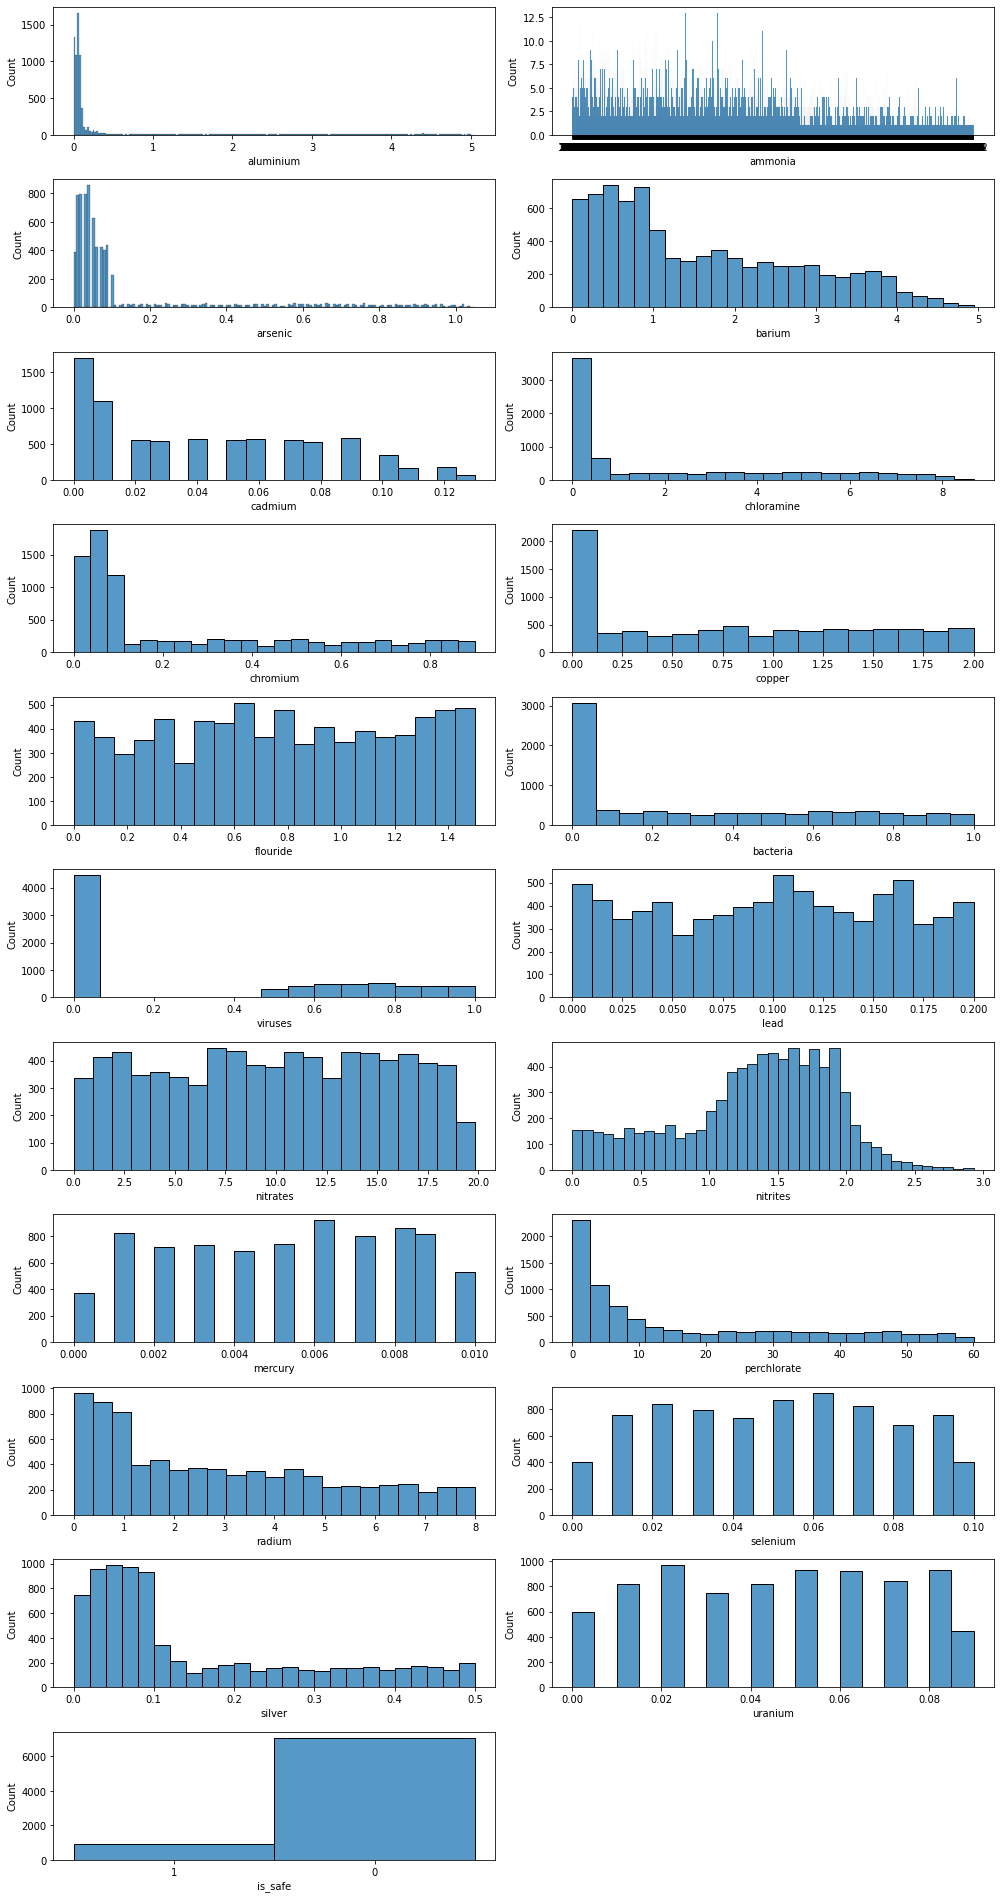

In [13]:
plt.figure(figsize=(14,50))
for i,col in enumerate(df.columns):
    ax = plt.subplot(21,2,i + 1)
    sns.histplot(x=df[col])
plt.tight_layout()
plt.show()
    

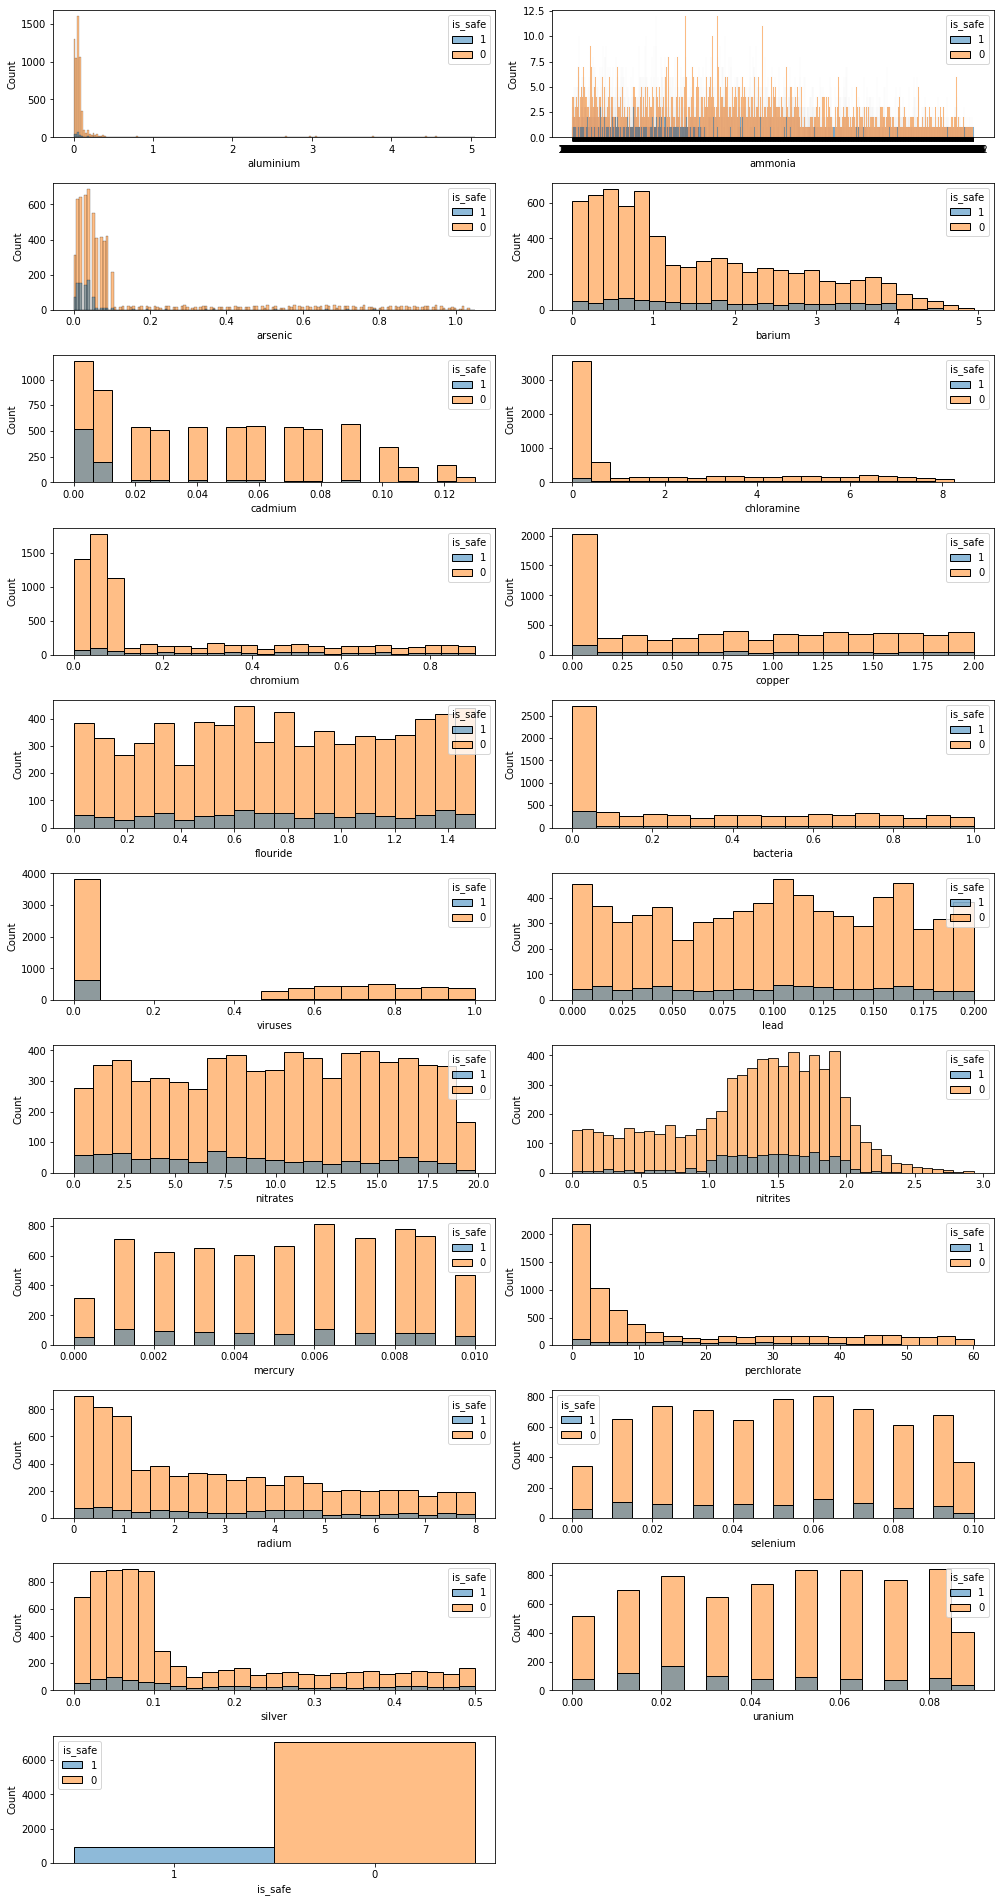

In [14]:
plt.figure(figsize=(14,50))
for i,col in enumerate(df.columns):
    ax = plt.subplot(21,2,i + 1)
    sns.histplot(x=df[col], hue=df['is_safe'])
plt.tight_layout()
plt.show()
    

In [16]:
y = df.is_safe
X = df.drop('is_safe', axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<AxesSubplot:ylabel='is_safe'>

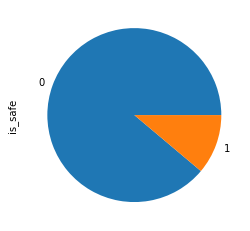

In [21]:
y_train.value_counts().plot.pie()

In [22]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = classifier.predict(X_test)

In [25]:
print('Train Score:', classifier.score(X_train, y_train))
print('Test Score:', classifier.score(X_test, y_test))
print(classification_report(y_test, y_pred))



Train Score: 0.8519387116948093
Test Score: 0.850625
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1400
           1       0.43      0.61      0.51       200

    accuracy                           0.85      1600
   macro avg       0.69      0.75      0.71      1600
weighted avg       0.88      0.85      0.86      1600



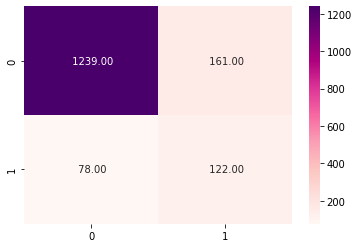

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm_ = cm/ cm.sum(axis=1).reshape(-1, 1)
print()
print()

fig,ax = plt.subplots(1,figsize=(6,4))
sns.heatmap(cm, annot=True, fmt=' .2f', cmap='RdPu')
plt.show()